In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
Index_data = pd.read_excel('Practicum.xlsx', sheetname='Indexcal')
Index_data.head()

,CensusTract,ECE.enrolled,school_poverty,student_teacher_ratio,free_lunch,reduced_lunch,Title1_school,high_quality_ECE_centers,math.proficiency,reading.proficiency,HS Graduate %,Postseceducation,med_hhinc2016,Poverty_prob_index,MHLTH,PHLTH
0,48439980000,72.447620,60.845460,15.698653,32.366320,6.090274,1.0,1045.5,55.5,49.0,0.000000,0.000000,60183.5,315.850755,12.720566,9.454778
1,48113980000,34.995761,37.551673,15.698653,50.711977,8.037614,1.0,987.0,37.0,35.0,0.000000,0.000000,37493.0,554.815780,13.925000,9.214063
2,48113007826,53.724036,53.753145,15.353805,64.251798,1.444838,1.0,59.0,49.0,34.0,0.179487,0.289744,32344.0,205.573530,12.900000,7.900000
3,48113014002,39.138385,49.987528,14.125561,34.920635,3.174603,1.0,3.5,50.0,50.0,0.186667,0.453333,36406.0,159.580220,8.700000,12.900000
4,48113014103,39.200000,41.084082,18.763879,18.737673,5.226824,0.5,909.0,41.0,41.5,0.231194,0.253761,32568.0,822.984500,15.900000,10.200000


In [3]:
Index_data.shape

(1175, 16)

In [5]:
Index_data.columns

Index(['CensusTract', 'ECE.enrolled', 'school_poverty',
       'student_teacher_ratio', 'free_lunch', 'reduced_lunch', 'Title1_school',
       'high_quality_ECE_centers', 'math.proficiency', 'reading.proficiency',
       'HS Graduate %', 'Postseceducation', 'med_hhinc2016',
       'Poverty_prob_index', 'MHLTH', 'PHLTH'],
      dtype='object')

In [4]:
print(Index_data.describe())

        CensusTract  ECE.enrolled  school_poverty  student_teacher_ratio  \
count  1.175000e+03   1175.000000     1175.000000            1175.000000   
mean   4.820941e+10     46.117068       45.930764              15.216497   
std    1.521389e+08     27.035741       22.458555               2.918438   
min    4.808503e+10      0.000000        0.000000               2.100000   
25%    4.811301e+10     25.000000       29.106143              14.304136   
50%    4.811302e+10     45.238095       45.457181              15.261201   
75%    4.843911e+10     64.920091       61.852261              16.151504   
max    4.843998e+10    100.000000      100.000000              86.115854   

        free_lunch  reduced_lunch  Title1_school  high_quality_ECE_centers  \
count  1175.000000    1175.000000    1175.000000               1175.000000   
mean     53.376277       5.913610       0.809350               1378.271915   
std      27.162057       3.795836       0.358098                884.751199   
min

In [6]:
print(Index_data.isnull().sum())

CensusTract                 0
ECE.enrolled                0
school_poverty              0
student_teacher_ratio       0
free_lunch                  0
reduced_lunch               0
Title1_school               0
high_quality_ECE_centers    0
math.proficiency            0
reading.proficiency         0
HS Graduate %               0
Postseceducation            0
med_hhinc2016               0
Poverty_prob_index          0
MHLTH                       0
PHLTH                       0
dtype: int64


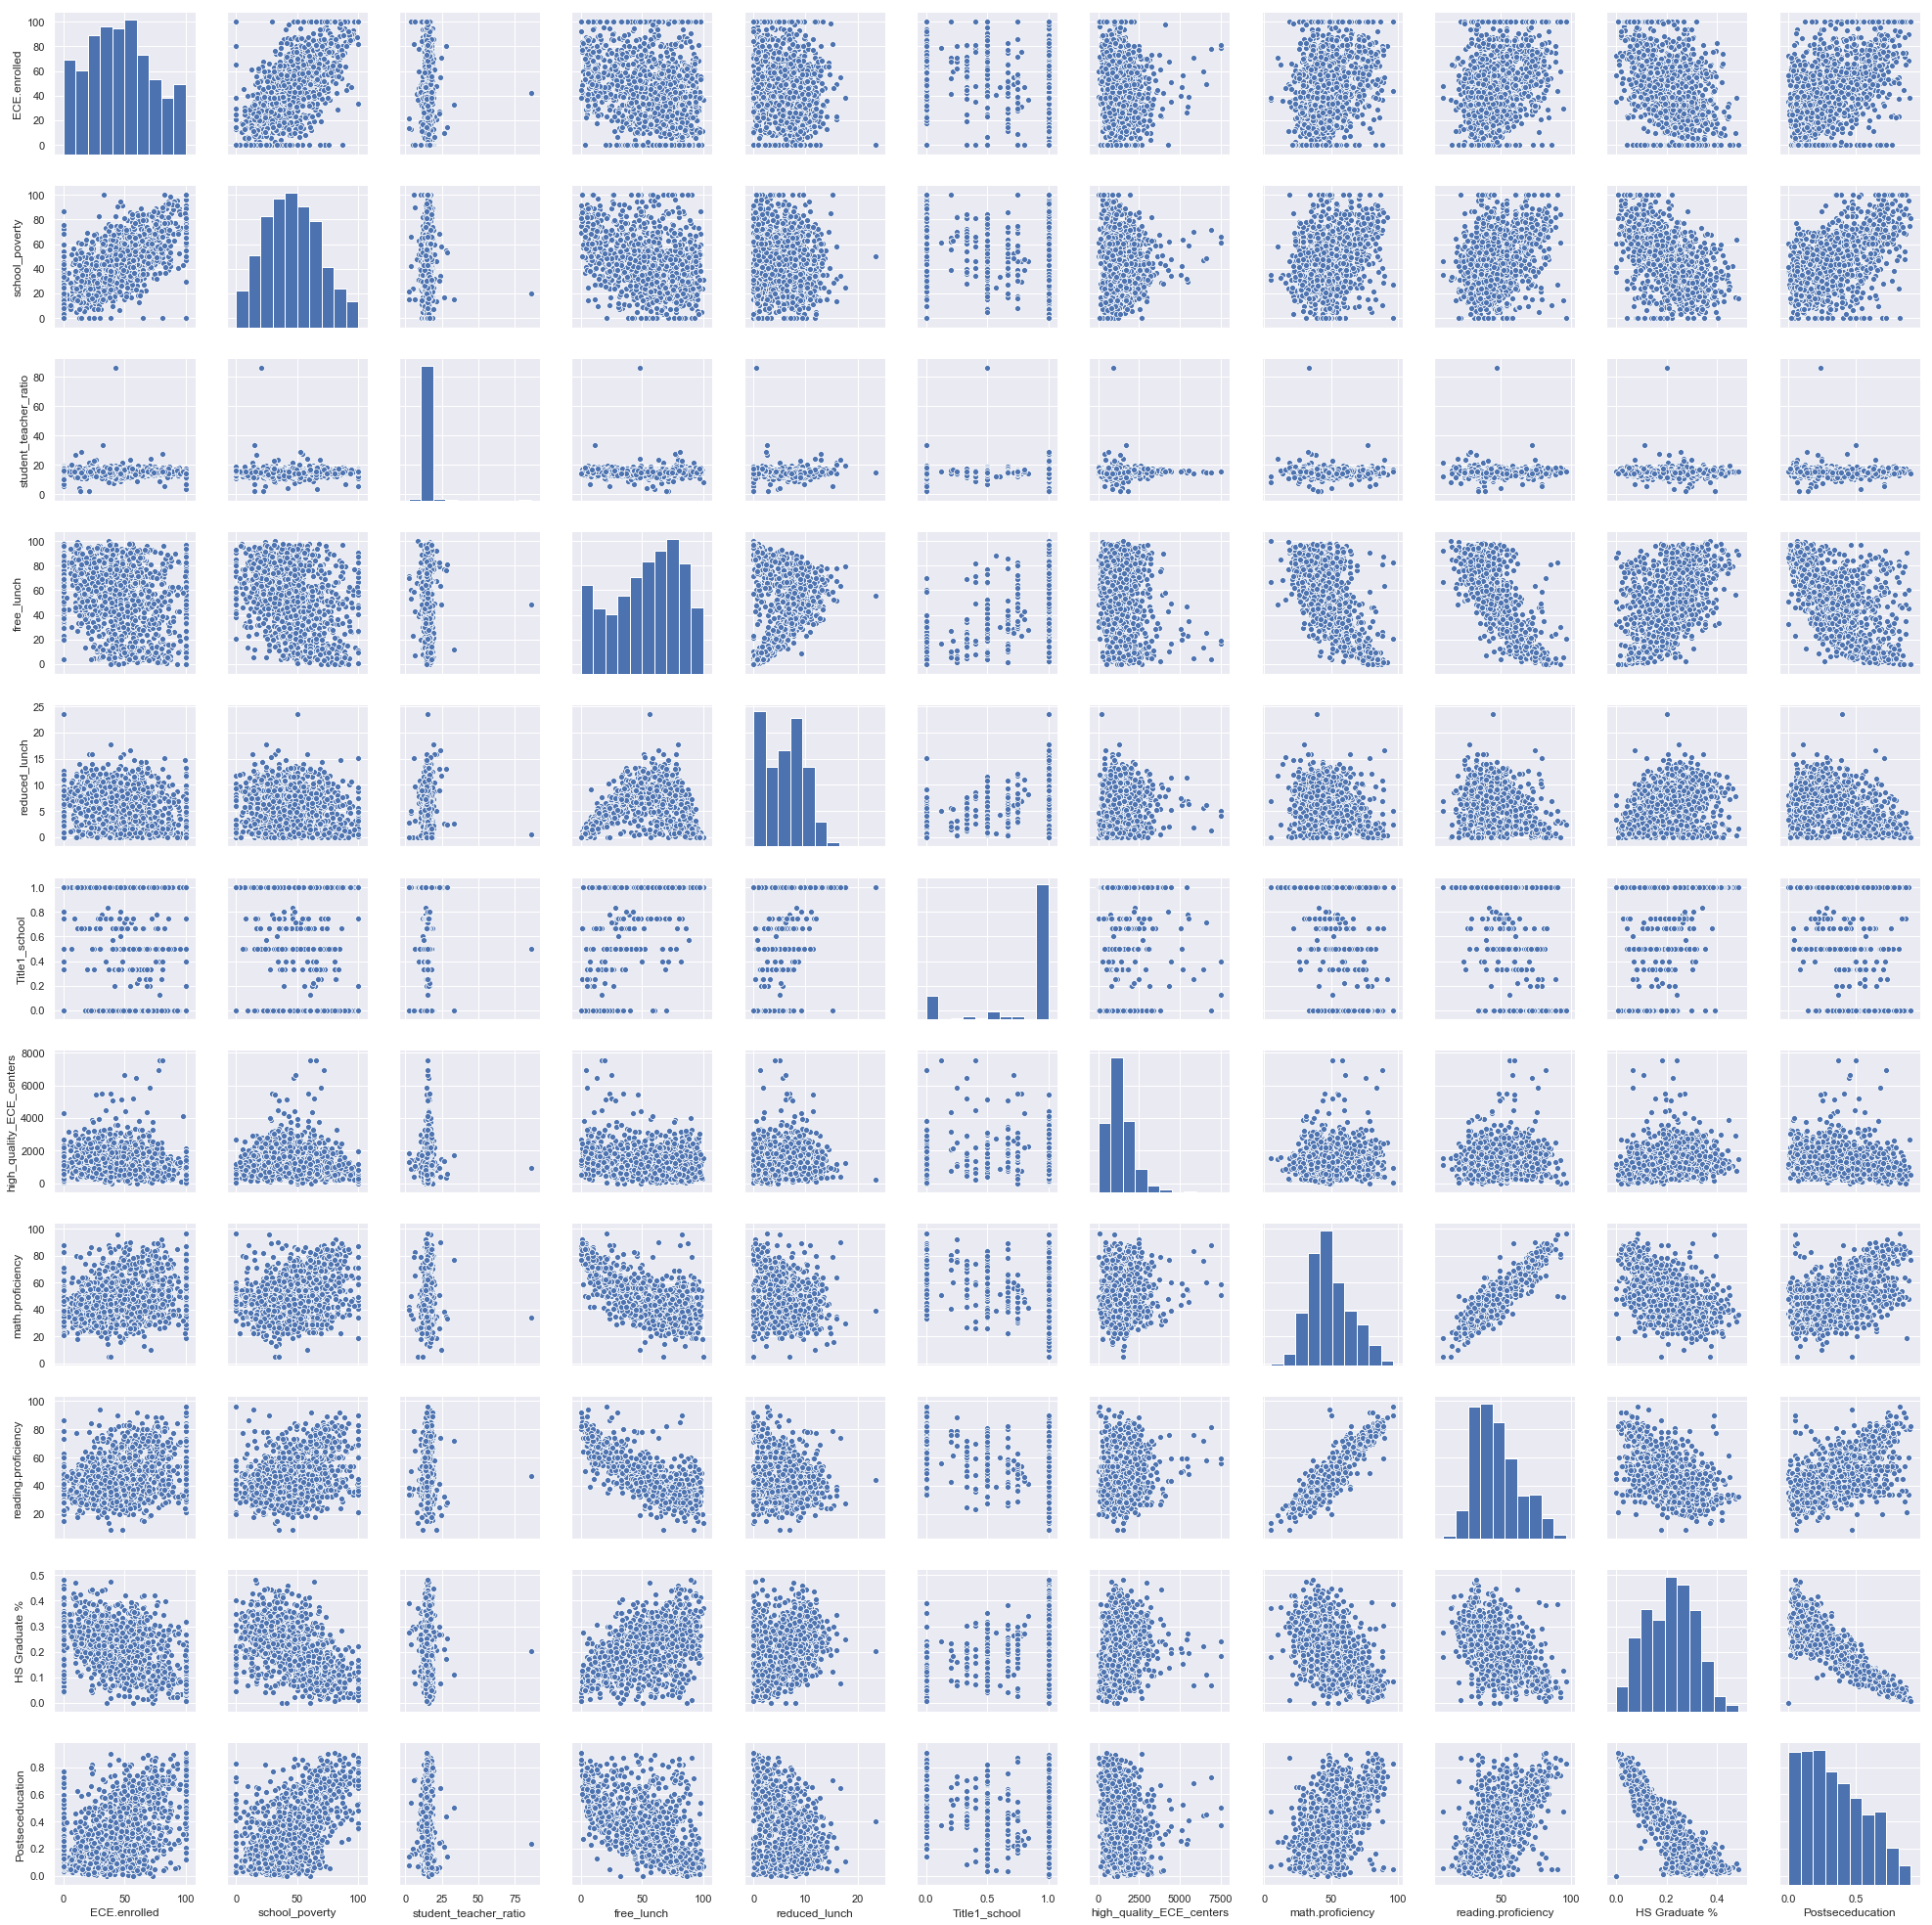

In [7]:
sns.set()
cols = ['ECE.enrolled', 'school_poverty',
       'student_teacher_ratio', 'free_lunch', 'reduced_lunch', 'Title1_school',
       'high_quality_ECE_centers', 'math.proficiency', 'reading.proficiency',
       'HS Graduate %', 'Postseceducation']
sns.pairplot(Index_data[cols],height=2.5)
plt.show(); 

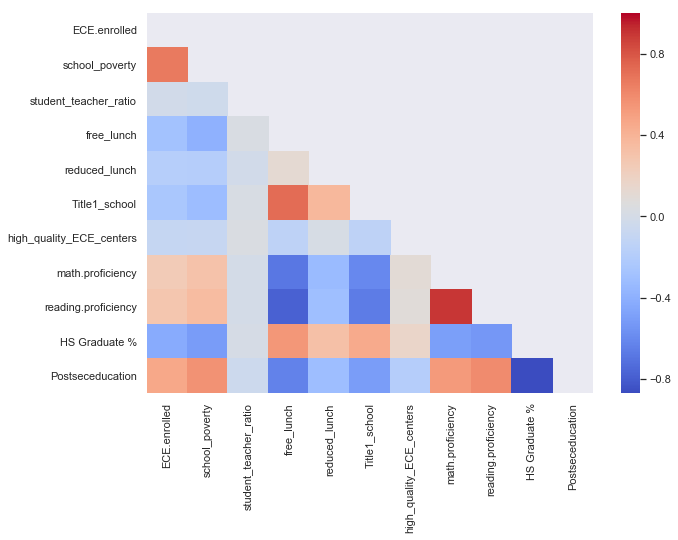

In [8]:
cols = ['ECE.enrolled', 'school_poverty',
       'student_teacher_ratio', 'free_lunch', 'reduced_lunch', 'Title1_school',
       'high_quality_ECE_centers', 'math.proficiency', 'reading.proficiency',
       'HS Graduate %', 'Postseceducation']
f, ax = plt.subplots(figsize=(10, 7))
corr = Index_data[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(Index_data[cols].corr(),mask=mask, cmap = 'coolwarm');
# high correlation => Drop 3 variables: 'HS Graduate %', 'Graduate Degree or Higher %','Bachelors Degree %'

In [16]:
# Reversed some columns by multiplying with -1 to ensure higher is better in the dataset

In [9]:
Index_data['Revers_Poverty_prob_index'] = Index_data['Poverty_prob_index']*-1
Index_data['Revers_MHLTH'] = Index_data['MHLTH']*-1
Index_data['Revers_PHLTH'] = Index_data['PHLTH']*-1  

In [10]:
# Drop free lunch and the unnecessary data
Index_data =Index_data.drop(columns=['Poverty_prob_index', 'MHLTH','PHLTH']) 

In [11]:
Index_data.shape

(1175, 16)

In [12]:
Index_data.columns

Index(['CensusTract', 'ECE.enrolled', 'school_poverty',
       'student_teacher_ratio', 'free_lunch', 'reduced_lunch', 'Title1_school',
       'high_quality_ECE_centers', 'math.proficiency', 'reading.proficiency',
       'HS Graduate %', 'Postseceducation', 'med_hhinc2016',
       'Revers_Poverty_prob_index', 'Revers_MHLTH', 'Revers_PHLTH'],
      dtype='object')

In [13]:
Index_data.head()

,CensusTract,ECE.enrolled,school_poverty,student_teacher_ratio,free_lunch,reduced_lunch,Title1_school,high_quality_ECE_centers,math.proficiency,reading.proficiency,HS Graduate %,Postseceducation,med_hhinc2016,Revers_Poverty_prob_index,Revers_MHLTH,Revers_PHLTH
0,48439980000,72.447620,60.845460,15.698653,32.366320,6.090274,1.0,1045.5,55.5,49.0,0.000000,0.000000,60183.5,-315.850755,-12.720566,-9.454778
1,48113980000,34.995761,37.551673,15.698653,50.711977,8.037614,1.0,987.0,37.0,35.0,0.000000,0.000000,37493.0,-554.815780,-13.925000,-9.214063
2,48113007826,53.724036,53.753145,15.353805,64.251798,1.444838,1.0,59.0,49.0,34.0,0.179487,0.289744,32344.0,-205.573530,-12.900000,-7.900000
3,48113014002,39.138385,49.987528,14.125561,34.920635,3.174603,1.0,3.5,50.0,50.0,0.186667,0.453333,36406.0,-159.580220,-8.700000,-12.900000
4,48113014103,39.200000,41.084082,18.763879,18.737673,5.226824,0.5,909.0,41.0,41.5,0.231194,0.253761,32568.0,-822.984500,-15.900000,-10.200000


In [14]:
# ANALYZE OUTLIERS BY Z-SCORE

In [15]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Index_data))
print(z)

[[1.51618511 0.97433111 0.66438144 ... 0.48657614 0.23435078 0.73247488]
 [0.62750572 0.41153092 0.37325013 ... 0.01037778 0.13211662 0.79876955]
 [0.63389848 0.28148689 0.34845128 ... 0.7159097  0.17975524 1.16067136]
 ...
 [0.63388677 0.01824663 0.22574159 ... 0.5873508  0.94041834 0.27144425]
 [0.6338204  1.99387455 1.55268728 ... 1.09815111 1.196845   1.04258342]
 [0.63388547 0.30503415 0.67409094 ... 5.03795529 2.19351361 1.67601917]]


In [16]:
threshold = 5
print(np.where(z > 5))

(array([ 258,  263,  542,  599,  702,  884,  959, 1004, 1092, 1126, 1174],
      dtype=int64), array([ 7,  7, 13,  3,  7,  7,  7,  7,  3, 13, 13], dtype=int64))


In [17]:
print(z[41][4])
3.375038763517309

0.20302390986919294


3.375038763517309

In [18]:
Index_data.shape

(1175, 16)

In [19]:
Index_data_NoOutlier = Index_data[(z < 5).all(axis=1)]

In [20]:
Index_data_NoOutlier.shape  
# 12 outliers are dropped from the dataset. This is fine we can keep these data to avoid missing censustract in the final index

(1164, 16)

In [21]:
#Z-SCORE TO SCALE THE DATA

In [22]:
Index_data.shape

(1175, 16)

In [23]:
Index_data.head()

,CensusTract,ECE.enrolled,school_poverty,student_teacher_ratio,free_lunch,reduced_lunch,Title1_school,high_quality_ECE_centers,math.proficiency,reading.proficiency,HS Graduate %,Postseceducation,med_hhinc2016,Revers_Poverty_prob_index,Revers_MHLTH,Revers_PHLTH
0,48439980000,72.447620,60.845460,15.698653,32.366320,6.090274,1.0,1045.5,55.5,49.0,0.000000,0.000000,60183.5,-315.850755,-12.720566,-9.454778
1,48113980000,34.995761,37.551673,15.698653,50.711977,8.037614,1.0,987.0,37.0,35.0,0.000000,0.000000,37493.0,-554.815780,-13.925000,-9.214063
2,48113007826,53.724036,53.753145,15.353805,64.251798,1.444838,1.0,59.0,49.0,34.0,0.179487,0.289744,32344.0,-205.573530,-12.900000,-7.900000
3,48113014002,39.138385,49.987528,14.125561,34.920635,3.174603,1.0,3.5,50.0,50.0,0.186667,0.453333,36406.0,-159.580220,-8.700000,-12.900000
4,48113014103,39.200000,41.084082,18.763879,18.737673,5.226824,0.5,909.0,41.0,41.5,0.231194,0.253761,32568.0,-822.984500,-15.900000,-10.200000


In [24]:
from scipy.stats import zscore
Index_data1=Index_data.iloc[:,1:16].apply(zscore)

In [25]:
Index_data1.shape

(1175, 15)

In [26]:
Index_data2=pd.concat([Index_data, Index_data1], axis=1)

In [27]:
Index_data2.columns

Index(['CensusTract', 'ECE.enrolled', 'school_poverty',
       'student_teacher_ratio', 'free_lunch', 'reduced_lunch', 'Title1_school',
       'high_quality_ECE_centers', 'math.proficiency', 'reading.proficiency',
       'HS Graduate %', 'Postseceducation', 'med_hhinc2016',
       'Revers_Poverty_prob_index', 'Revers_MHLTH', 'Revers_PHLTH',
       'ECE.enrolled', 'school_poverty', 'student_teacher_ratio', 'free_lunch',
       'reduced_lunch', 'Title1_school', 'high_quality_ECE_centers',
       'math.proficiency', 'reading.proficiency', 'HS Graduate %',
       'Postseceducation', 'med_hhinc2016', 'Revers_Poverty_prob_index',
       'Revers_MHLTH', 'Revers_PHLTH'],
      dtype='object')

In [28]:
Index_data2.shape

(1175, 31)

In [29]:
Index_data2.columns=list(range(0,len(Index_data2.columns)))

In [30]:
Index_data2.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,48439980000,72.447620,60.845460,15.698653,32.366320,6.090274,1.0,1045.5,55.5,49.0,...,0.532623,-0.376279,0.408736,0.137309,-2.217818,-1.531388,-0.203293,0.486576,0.234351,0.732475
1,48113980000,34.995761,37.551673,15.698653,50.711977,8.037614,1.0,987.0,37.0,35.0,...,0.532623,-0.442428,-0.768629,-0.753814,-2.217818,-1.531388,-0.819754,-0.010378,-0.132117,0.798770
2,48113007826,53.724036,53.753145,15.353805,64.251798,1.444838,1.0,59.0,49.0,34.0,...,0.532623,-1.491757,-0.004933,-0.817465,-0.359013,-0.241703,-0.959643,0.715910,0.179755,1.160671
3,48113014002,39.138385,49.987528,14.125561,34.920635,3.174603,1.0,3.5,50.0,50.0,...,0.532623,-1.554513,0.058709,0.200960,-0.284661,0.486456,-0.849286,0.811558,1.457669,-0.216363
4,48113014103,39.200000,41.084082,18.763879,18.737673,5.226824,0.5,909.0,41.0,41.5,...,-0.864237,-0.530626,-0.514063,-0.340078,0.176469,-0.401865,-0.953557,-0.568064,-0.733040,0.527236


In [31]:
Index_data3=Index_data2.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) # drop the original data
Index_data3.shape

(1175, 16)

In [32]:
Index_data3.shape

(1175, 16)

In [33]:
# Rename columns for data after reversed and scaled by Z-score
Index_data3.columns= ['CensusTract','ECE.enrolled', 'school_poverty', 'student_teacher_ratio', 'free_lunch',
       'reduced_lunch', 'Title1_school', 'high_quality_ECE_centers',
       'math.proficiency', 'reading.proficiency', 'HS Graduate %',
       'Postseceducation', 'med_hhinc2016', 'Revers_Poverty_prob_index',
       'Revers_MHLTH', 'Revers_PHLTH']
Index_data3.head()

,CensusTract,ECE.enrolled,school_poverty,student_teacher_ratio,free_lunch,reduced_lunch,Title1_school,high_quality_ECE_centers,math.proficiency,reading.proficiency,HS Graduate %,Postseceducation,med_hhinc2016,Revers_Poverty_prob_index,Revers_MHLTH,Revers_PHLTH
0,48439980000,0.974331,0.664381,0.165281,-0.773833,0.046561,0.532623,-0.376279,0.408736,0.137309,-2.217818,-1.531388,-0.203293,0.486576,0.234351,0.732475
1,48113980000,-0.411531,-0.373250,0.165281,-0.098131,0.559800,0.532623,-0.442428,-0.768629,-0.753814,-2.217818,-1.531388,-0.819754,-0.010378,-0.132117,0.798770
2,48113007826,0.281487,0.348451,0.047069,0.400564,-1.177784,0.532623,-1.491757,-0.004933,-0.817465,-0.359013,-0.241703,-0.959643,0.715910,0.179755,1.160671
3,48113014002,-0.258238,0.180710,-0.373967,-0.679753,-0.721889,0.532623,-1.554513,0.058709,0.200960,-0.284661,0.486456,-0.849286,0.811558,1.457669,-0.216363
4,48113014103,-0.255958,-0.215898,1.216025,-1.275800,-0.181008,-0.864237,-0.530626,-0.514063,-0.340078,0.176469,-0.401865,-0.953557,-0.568064,-0.733040,0.527236


In [34]:
Index_data3.shape

(1175, 16)

In [39]:
Index_data3.to_csv('Reversed_Scaled_Data2.csv', index=False) 

In [35]:
# REGRESSION TO CALCULATE THE WEIGHTS
# Create a LOOP function to iterate regression of X over Y for each independent and target variable
# Output the results

In [36]:
from sklearn.linear_model import LinearRegression

data=[]
a=['ECE.enrolled', 'school_poverty', 'student_teacher_ratio', 'free_lunch',
       'reduced_lunch', 'Title1_school', 'high_quality_ECE_centers',
       'math.proficiency', 'reading.proficiency', 'HS Graduate %','Postseceducation']
b=['med_hhinc2016', 'Revers_Poverty_prob_index','Revers_MHLTH', 'Revers_PHLTH']

for X in a:
    for y in b:
        lr = LinearRegression()    
        lr.fit(Index_data3[[X]],Index_data3[y])        
        data.append(lr.coef_)

In [37]:
Pearson_correl_matrix = np.reshape(data, (11, 4)).T
Pearson_correl_matrix

array([[ 0.40319577,  0.51669166, -0.02826336, -0.67422468, -0.29355339,
        -0.57522014,  0.06121143,  0.59795259,  0.63722833, -0.67722056,
         0.78739752],
       [ 0.29433314,  0.39299386, -0.03533634, -0.602247  , -0.02098483,
        -0.38260495, -0.3132513 ,  0.35887555,  0.43720007, -0.54630062,
         0.69669814],
       [ 0.39480797,  0.46686834, -0.05911744, -0.64586675, -0.15920151,
        -0.42727656, -0.10784902,  0.50229594,  0.55799158, -0.70664238,
         0.8487474 ],
       [ 0.2231957 ,  0.2416627 , -0.04554368, -0.46229043, -0.06585759,
        -0.27556025,  0.01324766,  0.30305561,  0.34281982, -0.38159759,
         0.43294884]])

In [38]:
# Transpose maxtrix again
Pearson_correl_matrix = np.reshape(Pearson_correl_matrix,(4,11)).T
Pearson_correl_matrix

array([[ 0.40319577,  0.29433314,  0.39480797,  0.2231957 ],
       [ 0.51669166,  0.39299386,  0.46686834,  0.2416627 ],
       [-0.02826336, -0.03533634, -0.05911744, -0.04554368],
       [-0.67422468, -0.602247  , -0.64586675, -0.46229043],
       [-0.29355339, -0.02098483, -0.15920151, -0.06585759],
       [-0.57522014, -0.38260495, -0.42727656, -0.27556025],
       [ 0.06121143, -0.3132513 , -0.10784902,  0.01324766],
       [ 0.59795259,  0.35887555,  0.50229594,  0.30305561],
       [ 0.63722833,  0.43720007,  0.55799158,  0.34281982],
       [-0.67722056, -0.54630062, -0.70664238, -0.38159759],
       [ 0.78739752,  0.69669814,  0.8487474 ,  0.43294884]])

In [39]:
# Convert to dataframe all correlation  this is the Table 5 of the article
a=['ECE.enrolled', 'school_poverty', 'student_teacher_ratio', 'free_lunch',
       'reduced_lunch', 'Title1_school', 'high_quality_ECE_centers',
       'math.proficiency', 'reading.proficiency', 'HS Graduate %','Postseceducation']
b=['Median_Household_Income', 'Reverse_Poverty_Prob_Index', 'Reverse_Mental_Health','Reverse_Physical_health']
Indicator_outcome_Correl = pd.DataFrame(Pearson_correl_matrix, index=a, columns=b)
Indicator_outcome_Correl

,Median_Household_Income,Reverse_Poverty_Prob_Index,Reverse_Mental_Health,Reverse_Physical_health
ECE.enrolled,0.403196,0.294333,0.394808,0.223196
school_poverty,0.516692,0.392994,0.466868,0.241663
student_teacher_ratio,-0.028263,-0.035336,-0.059117,-0.045544
free_lunch,-0.674225,-0.602247,-0.645867,-0.462290
reduced_lunch,-0.293553,-0.020985,-0.159202,-0.065858
Title1_school,-0.575220,-0.382605,-0.427277,-0.275560
high_quality_ECE_centers,0.061211,-0.313251,-0.107849,0.013248
math.proficiency,0.597953,0.358876,0.502296,0.303056
reading.proficiency,0.637228,0.437200,0.557992,0.342820
HS Graduate %,-0.677221,-0.546301,-0.706642,-0.381598


In [40]:
Indicator_outcome_Correl['Avg columns 1-4']=Indicator_outcome_Correl[['Median_Household_Income','Reverse_Poverty_Prob_Index','Reverse_Mental_Health','Reverse_Physical_health']].mean(axis=1)
Indicator_outcome_Correl

,Median_Household_Income,Reverse_Poverty_Prob_Index,Reverse_Mental_Health,Reverse_Physical_health,Avg columns 1-4
ECE.enrolled,0.403196,0.294333,0.394808,0.223196,0.328883
school_poverty,0.516692,0.392994,0.466868,0.241663,0.404554
student_teacher_ratio,-0.028263,-0.035336,-0.059117,-0.045544,-0.042065
free_lunch,-0.674225,-0.602247,-0.645867,-0.462290,-0.596157
reduced_lunch,-0.293553,-0.020985,-0.159202,-0.065858,-0.134899
Title1_school,-0.575220,-0.382605,-0.427277,-0.275560,-0.415165
high_quality_ECE_centers,0.061211,-0.313251,-0.107849,0.013248,-0.086660
math.proficiency,0.597953,0.358876,0.502296,0.303056,0.440545
reading.proficiency,0.637228,0.437200,0.557992,0.342820,0.493810
HS Graduate %,-0.677221,-0.546301,-0.706642,-0.381598,-0.577940


In [48]:
Indicator_outcome_Correl.to_csv('Weight Caculatioin2.csv', index=True)  